In [44]:
import pickle
from dataprocessing import load_data
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
!pip3 install imblearn
!pip3 install xgboost

In [46]:
with open("model1.pickle","rb") as picklefile:
    model = pickle.load(picklefile)

In [47]:
X_train, X_test, y_train, y_test = load_data("../data/healthcare-dataset-stroke-data.csv")

        age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
40041  31.0           0.0            0.0              64.85  23.0   
55244  40.0           0.0            0.0              65.29  28.3   
70992   8.0           0.0            0.0              74.42  22.5   
38207  79.0           1.0            0.0              76.64  19.5   
8541   75.0           0.0            0.0              94.77  27.2   
...     ...           ...            ...                ...   ...   
56543  70.0           0.0            0.0              69.04  35.9   
34958  14.0           0.0            0.0              92.86  20.7   
15104  26.0           0.0            0.0              88.79  24.9   
28333  79.0           1.0            1.0             200.28  30.0   
27916  18.0           0.0            0.0              97.39  22.8   

       is_user_diabetic  Female  Govt_job  Male  Never_worked  ...  \
id                              

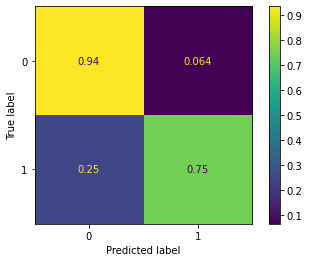

In [48]:

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions,normalize = 'true', labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot() 


        age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
40041  31.0           0.0            0.0              64.85  23.0   
55244  40.0           0.0            0.0              65.29  28.3   
70992   8.0           0.0            0.0              74.42  22.5   
38207  79.0           1.0            0.0              76.64  19.5   
8541   75.0           0.0            0.0              94.77  27.2   
...     ...           ...            ...                ...   ...   
56543  70.0           0.0            0.0              69.04  35.9   
34958  14.0           0.0            0.0              92.86  20.7   
15104  26.0           0.0            0.0              88.79  24.9   
28333  79.0           1.0            1.0             200.28  30.0   
27916  18.0           0.0            0.0              97.39  22.8   

       is_user_diabetic  Female  Govt_job  Male  Never_worked  ...  \
id                              

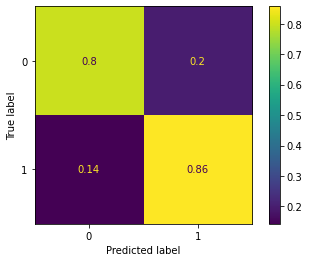

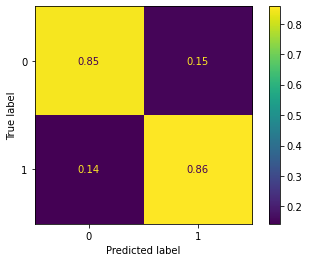

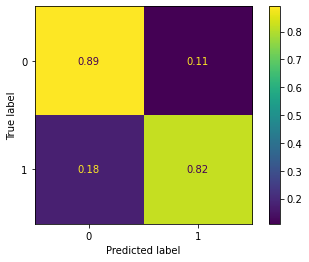

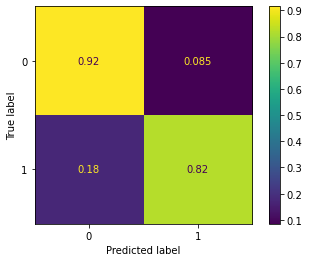

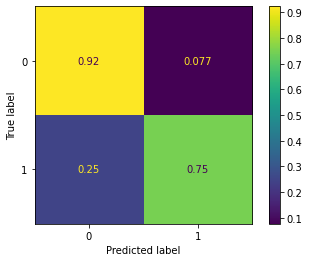

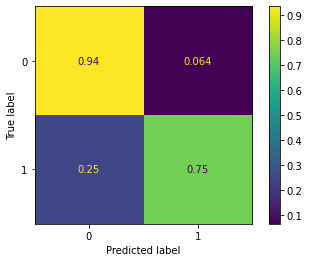

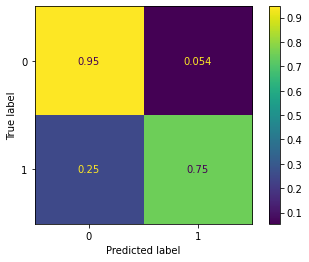

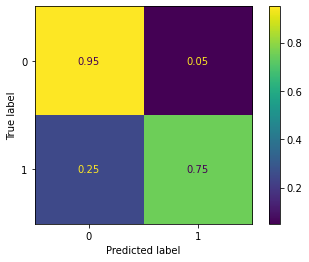

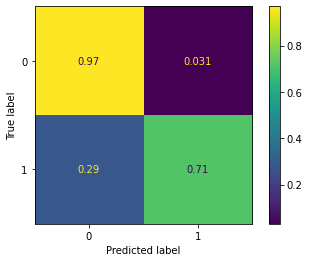

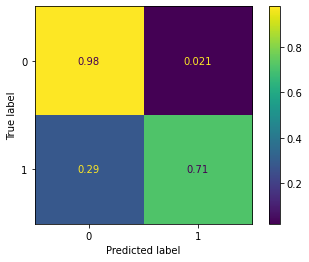

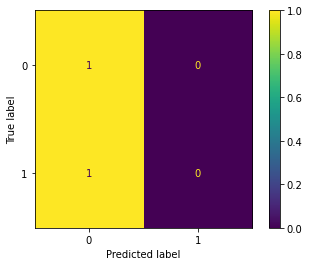

In [49]:
prediction_probas = model.predict_proba(X_test)[:,-1]



thresholds = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in thresholds:
    rounded_prediction = np.where(prediction_probas >= i , 1, 0)
    print("Threshold: {}".format(i))
    cm =  confusion_matrix(y_test,rounded_prediction,labels = model.classes_,normalize = 'true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=model.classes_)
    disp.plot()


        age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
40041  31.0           0.0            0.0              64.85  23.0   
55244  40.0           0.0            0.0              65.29  28.3   
70992   8.0           0.0            0.0              74.42  22.5   
38207  79.0           1.0            0.0              76.64  19.5   
8541   75.0           0.0            0.0              94.77  27.2   
...     ...           ...            ...                ...   ...   
56543  70.0           0.0            0.0              69.04  35.9   
34958  14.0           0.0            0.0              92.86  20.7   
15104  26.0           0.0            0.0              88.79  24.9   
28333  79.0           1.0            1.0             200.28  30.0   
27916  18.0           0.0            0.0              97.39  22.8   

       is_user_diabetic  Female  Govt_job  Male  Never_worked  ...  \
id                              

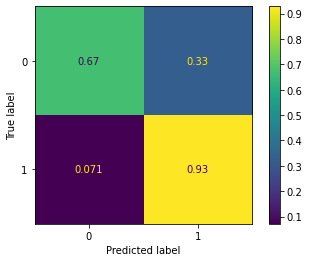

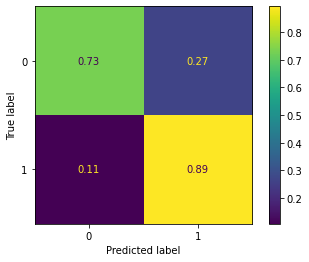

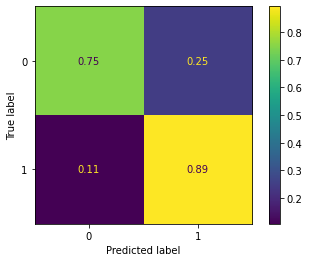

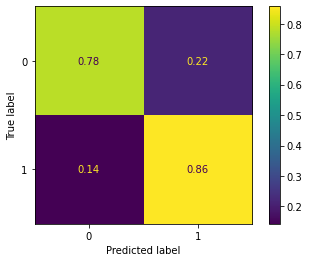

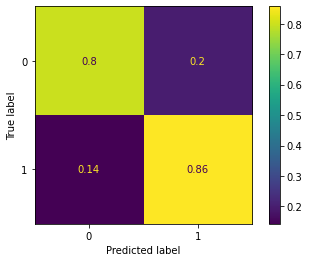

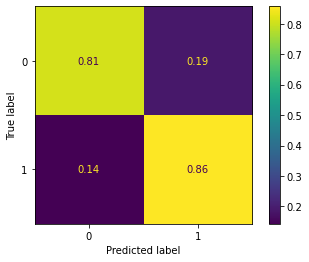

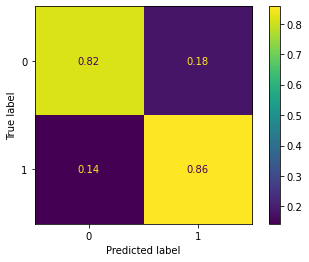

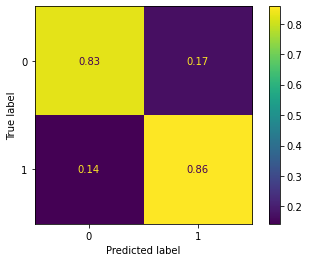

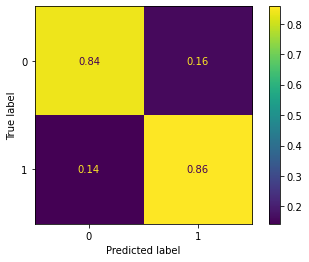

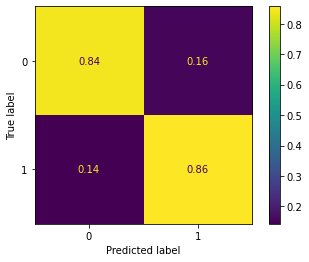

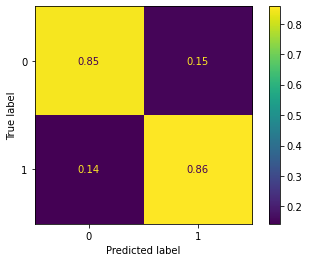

In [51]:
prediction_probas = model.predict_proba(X_test)[:,-1]



thresholds = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.095,0.1]

for i in thresholds:
    rounded_prediction = np.where(prediction_probas >= i , 1, 0)
    print("Threshold: {}".format(i))
    cm =  confusion_matrix(y_test,rounded_prediction,labels = model.classes_,normalize = 'true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=model.classes_)
    disp.plot()


## Seems like the golden mark for our threshhold is 0.01

